In [1]:
import numpy as np
import pandas as pd

In [2]:
bank = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Logisitc Regression\\bank-full.csv",sep=";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [5]:
bank.dtypes+

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank['y'] = (bank['y']=='yes').astype(int)

In [7]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [8]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [9]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [10]:
bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


#### Data Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency of Purpose')

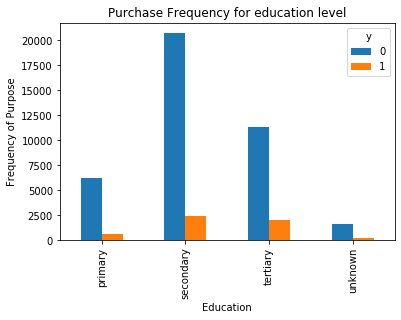

In [12]:
pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for education level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purpose')

Text(0, 0.5, 'Proportion of Customers')

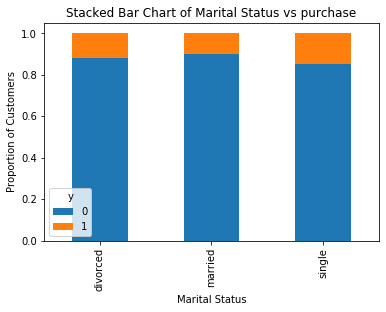

In [13]:
table = pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of purchase')

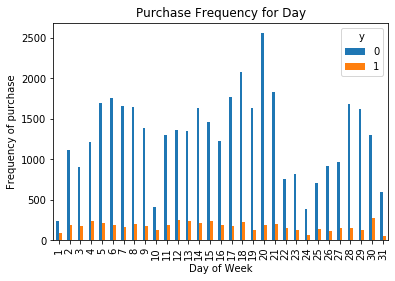

In [14]:
pd.crosstab(bank.day,bank.y).plot(kind="bar")
plt.title('Purchase Frequency for Day')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of purchase')

Text(0, 0.5, 'Frequency of purchase')

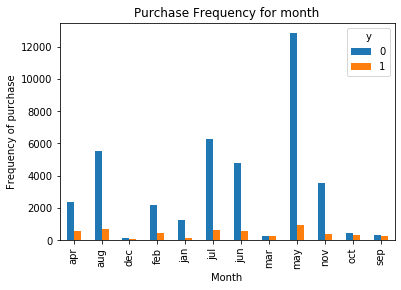

In [15]:
pd.crosstab(bank.month,bank.y).plot(kind="bar")
plt.title('Purchase Frequency for month')
plt.xlabel('Month')
plt.ylabel('Frequency of purchase')

Text(0, 0.5, 'Frequency')

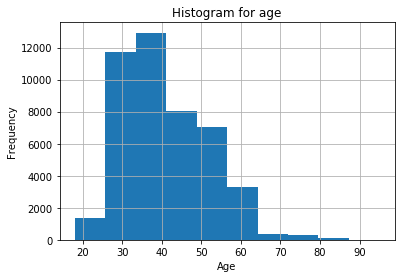

In [16]:
bank.age.hist()
plt.title("Histogram for age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency of purchase')

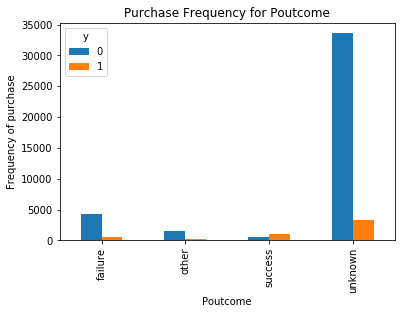

In [17]:
pd.crosstab(bank.poutcome,bank.y).plot(kind="bar")
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of purchase')

### Creating Dummy Variables

In [18]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var],prefix=var)
    bank1=bank.join(cat_list)
    bank=bank1

In [19]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
bank_vars = bank.columns.values.tolist()
to_keep= [i for i in bank_vars if i not in cat_vars]

In [20]:
bank_final=bank[to_keep]
bank_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [21]:
bank_final_vars = bank_final.columns.values.tolist()
Y=['y']
X = [i for i in bank_final_vars if i not in Y]

### Feature Selection

In [22]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
rfe = RFE(model,12)

In [25]:
rfe = rfe.fit(bank_final[X],bank_final[Y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Prajwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prajwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Prajwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

C:\Users\Prajwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Prajwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False False False False  True False
  True  True False  True  True False  True False  True  True  True False
 False  True False]
[38 40 37 36 23 39 34 33 25 21 14 30  8 28 27  1 29 16 22 24 10 35 12 26
 17 31 32 18 11  1  4 15  9 13  1 20  1  1  3  1  1 19  1  2  1  1  1  5
  7  1  6]


In [26]:
cols = ['previous','job_entrepreneur','job_self-employed','poutcome_success','poutcome_failure','month_oct','month_may','month_mar','month_jun','month_jul','month_dec']
X = bank_final[cols]
Y = bank_final['y']

### Implementing the model

In [27]:
import statsmodels.api as sm

In [28]:
logit_model = sm.Logit(Y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.427823
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45200
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Jun 2020   Pseudo R-squ.:                 -0.1855
Time:                        12:35:27   Log-Likelihood:                -19342.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
previous             -0.0554      0.009     -6.197      0.000      -0.073      -0.038
job_entrepreneur     -1.3843      0.100    -13.831      0.000      -1.580      -1.188
job_self-employed    -1.2344      0.084    -14.706      0.000      -1.399      -1.070
poutcome_success      1.6785      0.069     24.189      0.000       1.542       1.814
poutcome_failure     -1.2004      0.050    -23.790      0.000      -1.299      -1.102
month_oct            -0.1988      0.082     -2.437      0.015      -0.359      -0.039
month_may            -2.5302      0.035    -73.171      0.000      -2.598      -2.462
month_mar             0.1835      0.098      1.877      0.060      -0.008       0.375
month_jun            -2.1422      0.046    -46.783      0.000      -2.232      -2.052
month_jul            -2.2621      0.042    -53.517      0.000      -2.345      -2.179
month_dec            -0.1680      0.152     -1.107      0.268      -0.465       0.129
=====================================================================================
"""

In [29]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
clf.score(X,Y)

0.8925703921611997

In [31]:
pd.DataFrame(zip(X.columns,np.transpose(clf.coef_)))

,0,1
0,previous,[0.022253003914650942]
1,job_entrepreneur,[-0.24378673258640424]
2,job_self-employed,[-0.03583959334319463]
3,poutcome_success,[2.578586125104422]
4,poutcome_failure,[0.13333399478383975]
5,month_oct,[1.3329566485129754]
6,month_may,[-0.7254659616732754]
7,month_mar,[1.8360699238549019]
8,month_jun,[-0.2488205734141759]
9,month_jul,[-0.33668147703459483]


### Model Validation and evaluation

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [33]:
from sklearn import linear_model
from sklearn import metrics

In [34]:
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
probs = clf1.predict_proba(X_test)

In [36]:
probs

array([[0.91686272, 0.08313728],
       [0.88484927, 0.11515073],
       [0.91686272, 0.08313728],
       ...,
       [0.91166662, 0.08833338],
       [0.88484927, 0.11515073],
       [0.86992708, 0.13007292]])

In [37]:
predicted = clf1.predict(X_test)

In [38]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
prob = probs[:,1]

In [40]:
prob_df=pd.DataFrame(prob)

In [41]:
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df.head()

,0,predict
0,0.083137,0
1,0.115151,1
2,0.083137,0
3,0.131526,1
4,0.083137,0


In [42]:
metrics.accuracy_score(Y_test,predicted)

0.8909613683279268

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring='accuracy',cv=8)

In [45]:
print(scores)

[0.88305025 0.88393489 0.88517339 0.88904619 0.88586091 0.88232171
 0.91576712 0.78393205]


In [46]:
scores.mean()

0.8761358131629811

### Model Validation

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [48]:
clf1 = linear_model.LogisticRegression()

In [49]:
clf1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
probs = clf1.predict_proba(X_test)

In [51]:
prob = probs[:,1]

In [52]:
prob_df = pd.DataFrame(prob)

In [53]:
prob_df['predict']=np.where(prob_df[0]>=0.5,1,0)

In [54]:
prob_df['actual']=Y_test

In [55]:
prob_df.head()

,0,predict,actual
0,0.083137,0,NaN
1,0.115151,0,NaN
2,0.083137,0,NaN
3,0.131526,0,0.0
4,0.083137,0,NaN


#### Confusion Matrix

In [56]:
confusion_matrix = pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

predict,0,1
actual,,
0.0,3800,120
1.0,162,1


Text(0.5, 1.0, 'ROC Curve')

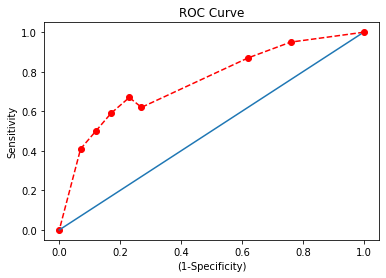

In [62]:
Sensitivity = [1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0]
FPR =[1,0.76,0.62,0.27,0.23,0.17,0.12,0.07,0]
plt.plot(FPR,Sensitivity,marker="o",linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

In [63]:
roc_auc = metrics.auc(FPR,Sensitivity)

In [64]:
roc_auc

0.7501

#### The Area under the curve comes out to be 0.7501 which is pretty good